In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    roc_curve,
)

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Customer churn Data Set

This data was downloaded from the [Open ML Repositery](https://www.openml.org/d/40701)

## Abstract

A dataset relating characteristics of telephony account features and usage and whether or not the customer churned. Originally used in Discovering Knowledge in Data: An Introduction to Data Mining.

In [26]:
from sklearn.datasets import fetch_openml

churn = fetch_openml("churn", version=1)
X, y = (
    pd.DataFrame(churn["data"].values, columns=churn["feature_names"]),
    pd.DataFrame(churn["target"].values, columns=["target"]),
)
y.target.value_counts()

0    4293
1     707
Name: target, dtype: int64

## Sklearn Method

Accuracy on training set:  0.7859701492537313
Accuracy on testing set:  0.78
[[1115  299]
 [  64  172]]


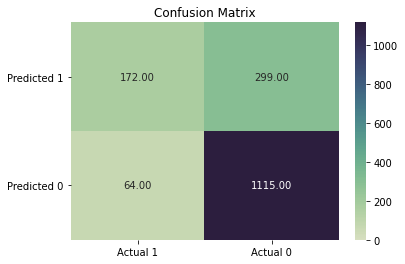

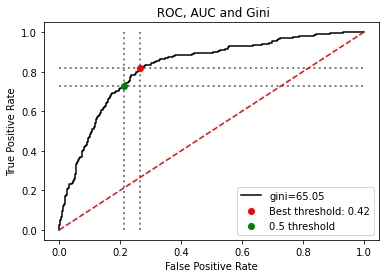

Gini coefficient : 0.6505166255124304
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      1414
           1       0.37      0.73      0.49       236

    accuracy                           0.78      1650
   macro avg       0.66      0.76      0.67      1650
weighted avg       0.86      0.78      0.81      1650



In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1
)
from imblearn.over_sampling import BorderlineSMOTE

sm = BorderlineSMOTE(k_neighbors=2)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train.target)
model = LogisticRegression(penalty="l1", solver="liblinear")
model.fit(X_train_bal, y_train_bal)

print("Accuracy on training set: ", model.score(X_train, y_train.target))
print("Accuracy on testing set: ", model.score(X_test, y_test.target))


def plot_confusion_matrix(y_true, y_pred, labels=["Predicted 1", "Predicted 0"], columns=["Actual 1", "Actual 0"]):
    print(confusion_matrix(y_true, y_pred))
    confusion_matrix_df = pd.DataFrame(
        confusion_matrix(y_true, y_pred)[::-1,::-1].T, index=labels, columns=columns
    )
    cmap = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
    res = sns.heatmap(confusion_matrix_df, annot=True, vmin=0.0, fmt=".2f", cmap=cmap)
    plt.yticks(rotation=0)
    plt.title("Confusion Matrix")
    plt.show()


def plot_roc(y_true, y_pred):
    # Area under the curve(AUC) and Receiver Operating Characteristic(ROC)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)

    # Chosing the best threshold (the one who maximize tpr - fpr)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]

    # auc = roc_auc_score(y_test_ub, y_pred)
    area = auc(fpr, tpr)

    # Gini coefficient
    GINI = (2 * area) - 1

    nearest_value_index = (np.abs(thresholds - 0.5)).argmin()

    # Plot ROC curve
    plt.title(" ROC, AUC and Gini")
    plt.plot(
        fpr, tpr, label="gini=" + str(round(GINI * 100, 2)), color="black", zorder=2
    )
    plt.hlines(
        y=tpr[optimal_idx],
        xmin=0,
        xmax=1,
        colors="grey",
        linestyles="dotted",
        lw=2,
        zorder=1,
    )
    plt.vlines(
        x=fpr[optimal_idx],
        ymin=0,
        ymax=1,
        colors="grey",
        linestyles="dotted",
        lw=2,
        zorder=1,
    )
    plt.scatter(
        fpr[optimal_idx],
        tpr[optimal_idx],
        color="red",
        label="Best threshold: " + str(round(optimal_threshold, 2)),
        zorder=10,
    )
    plt.hlines(
        y=tpr[nearest_value_index],
        xmin=0,
        xmax=1,
        colors="grey",
        linestyles="dotted",
        lw=2,
        zorder=1,
    )
    plt.vlines(
        x=fpr[nearest_value_index],
        ymin=0,
        ymax=1,
        colors="grey",
        linestyles="dotted",
        lw=2,
        zorder=1,
    )
    plt.scatter(
        fpr[nearest_value_index],
        tpr[nearest_value_index],
        color="green",
        label="0.5 threshold",
        zorder=10,
    )
    # plt.plot(fpr_cv, tpr_cv, label="gini cv="+str(GINI_cv), color='red')
    plt.plot([0, 1], [0, 1], "--", color="red")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc=4)
    plt.show()

    print("Gini coefficient : {}".format(GINI))


plot_confusion_matrix(y_test, model.predict(X_test))
plot_roc(y_test.target.astype(int), model.predict_proba(X_test)[:, 1])
print(classification_report(y_test, model.predict(X_test)))

## Manual Method

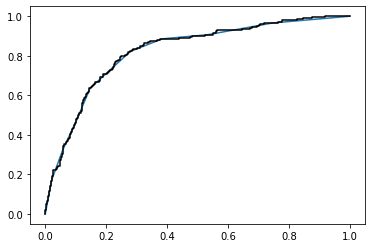

In [28]:
def fpr(fp, tn):
    return fp / (fp + tn)


def tpr(tp, fn):
    return tp / (tp + fn)


def manual_roc(y_true, y_pred):
    thresholds = np.arange(0, 1.01, 0.1)
    roc_x, roc_y = [], []
    for threshold in thresholds:
        cm = confusion_matrix(y_true, y_pred >= threshold)
        tp, tn, fp, fn = cm[1][1], cm[0][0], cm[0][1], cm[1][0]
        roc_x.append(fpr(fp, tn))
        roc_y.append(tpr(tp, fn))
    plt.plot(roc_x, roc_y)


manual_roc(y_test.target.astype(int), model.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(
    y_test.target.astype(int), model.predict_proba(X_test)[:, 1]
)
plt.plot(fpr, tpr, color="black", zorder=2)

In [ ]:
a = [0.03, 0.05, 0.06, 0.99]
b = [0.15, 0.92, 0.89, 0.91]